In [56]:
import numpy as np
import matplotlib.pyplot as plt

<br>
<br>
<br>
<br>

### Optimization with Gradient
<p/>

In [57]:
x = np.array([26, 25, 29, 30, 26, 35, 31, 28, 26, 30])
y = np.array([32, 28, 29, 29, 27, 38, 31, 33, 28, 32])

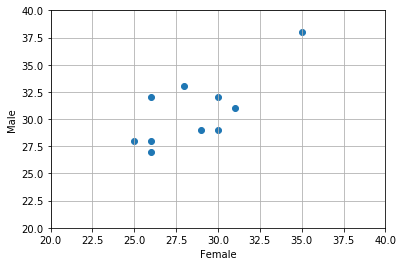

In [58]:
plt.scatter(x, y)
plt.xlim(20, 40)
plt.ylim(20, 40)
plt.xlabel('Female')
plt.ylabel('Male')
plt.grid()
plt.show()

\begin{align}
\hat{y} = ax + b + \epsilon
\end{align}

\begin{align}
\begin{bmatrix}
    x_{11} &  1 \\
    x_{21} &  1 \\
    ...\\
    x_{n1} &  1 \\
\end{bmatrix}
\begin{bmatrix}
    a \\
    b \\
\end{bmatrix}
+
\begin{bmatrix}
    \epsilon_{11} \\
    \epsilon_{21} \\
    ...\\
    \epsilon_{n1} \\
\end{bmatrix}
=
\begin{bmatrix}
    \hat{y}_{11} \\
    \hat{y}_{21} \\
    ...\\
    \hat{y}_{n1} \\
\end{bmatrix}
\end{align}

<br>

\begin{align}
\begin{bmatrix}
    x_{11} &  1 \\
    x_{21} &  1 \\
    ...\\
    x_{n1} &  1 \\
\end{bmatrix}
\begin{bmatrix}
    a \\
    b \\
\end{bmatrix}
-
\begin{bmatrix}
    \hat{y}_{11} \\
    \hat{y}_{21} \\
    ...\\
    \hat{y}_{n1} \\
\end{bmatrix}
=
\begin{bmatrix}
    \epsilon_{11} \\
    \epsilon_{21} \\
    ...\\
    \epsilon_{n1} \\
\end{bmatrix}
\end{align}

<br>
#### Define Loss Function

<br>
\begin{align}
L(a, b) &= \frac{1}{m}\sum_{i=1}^n(\hat{y}_i - y_i)^2 \\
&= \frac{1}{m}\sum_{i=1}^n((ax_i + b) - y_i)^2
\end{align}

In [59]:
loss_function = lambda a, b: np.mean((a * x + b - y) ** 2)

<br>
#### Objective

\begin{align}
O &= min(L) \\
&= min(\frac{1}{m}\sum_{i=1}^n(ax_i + b - y_i)^2)
\end{align}

<br>
<br>

<br>
#### Calculate Gradient

\begin{align}
\nabla L &= \begin{bmatrix}
               \frac{\partial}{\partial a}L(a, b) \\
               \frac{\partial}{\partial b}L(a, b) \\
               \end{bmatrix}
\end{align}

<br>
<br>

1) partial derivative of $a$

<br>
\begin{align}
\frac{\partial}{\partial a}L(a, b) &= \frac{2}{m}\sum_{i=1}^m(ax_i + b - y_i)x \\
\end{align}

In [60]:
partial_a = lambda a, b: 2 * np.mean((a * x + b - y) * x)

<br>
2) partial derivative of $b$

<br>
\begin{align}
\frac{\partial}{\partial b}L(a, b) &= \frac{2}{m}\sum_{i=1}^m(ax_i + b - y_i) \\
\end{align}

In [61]:
partial_b = lambda a, b: 2 * np.mean(a * x + b - y)

<br>
<span style='color:red'>HINT</span>

http://mccormickml.com/2014/03/04/gradient-descent-derivation/

* Scaler Multiplication
$$\frac{d}{dx}(\alpha f(x)) = \alpha \frac{d}{dx}(f(x))$$

* Sum Rule
$$\frac{d}{dx}\sum f(x) = \sum \frac{d}{dx} f(x)$$

* Power Rule
$$\frac{d}{dx}f(x)^n = n\frac{d}{dx}f(x)^{n-1}$$

* Chain Rule
$$\frac{d}{dx}f(g(x)) = f^\prime(g(x))g^\prime(x)$$
<p/>

\begin{align}
\frac{d}{dx}f(x_1, x_2, ..., x_n) &= f^\prime(\vec{v}) \cdot \vec{v}^\prime \\
\end{align}

<br>
<br>
<br>

<br>
<br>
<br>

<br>
\begin{equation}
a^{k+1} = a^{k} - \text{learning_rate} \times f^\prime(a^{k}) \\
b^{k+1} = b^{k} - \text{learning_rate} \times f^\prime(b^{k})
\end{equation}

In [62]:
def steepest_gradient_descent(loss_function, gradient, init, epoch, learning_rate, verbose=False):
    # monitoring
    params = np.array(init)
    params_path = []
    loss_path = []
    slope_path = []
    step_path = []
    
    
    for i in range(epoch):
        # 0. record parameters path
        params_path.append(params)
        
        # 1. calculate loss
        loss = loss_function(params[0], params[1])
        loss_path.append(loss)
        
        # 2. calculate slope with gradient
        slope = np.array([gradient[0](params[0], params[1]), gradient[1](params[0], params[1])])
        slope_path.append(slope)
        
        # 3. calculate step
        step = - learning_rate * slope
        step_path.append(step)
        
        # verbose
        if verbose == True:
            log = '{} a:{}, b:{}, loss:{}, slope:{}, step:{}'
            print(log.format(i, round(params[0],4), round(params[1], 4),
                             round(loss, 4), np.round(slope, 4), np.round(step, 4)))
            
        # 4. update next parameters
        params = params + step
        
    return params, loss, np.array(params_path), np.array(loss_path), np.array(slope_path), np.array(step_path)

In [63]:
a = 4.0
b = 5.0
params, loss, params_path, loss_path, slope_path, step_path = steepest_gradient_descent(
                                                                             loss_function=loss_function,
                                                                             gradient=[partial_a, partial_b],
                                                                             init=[a, b],
                                                                             epoch=100,
                                                                             learning_rate=1e-4,
                                                                             verbose=True)

0 a:4.0, b:5.0, loss:7958.1, slope:[5127.6  177.4], step:[-0.5128 -0.0177]
1 a:3.4872, b:4.9823, loss:5543.5248, slope:[4279.0955  148.0346], step:[-0.4279 -0.0148]
2 a:3.0593, b:4.9675, loss:3861.9493, slope:[3570.9999  123.5286], step:[-0.3571 -0.0124]
3 a:2.7022, b:4.9551, loss:2690.8547, slope:[2980.0784  103.0778], step:[-0.298  -0.0103]
4 a:2.4042, b:4.9448, loss:1875.2728, slope:[2486.9415   86.0111], step:[-0.2487 -0.0086]
5 a:2.1555, b:4.9362, loss:1307.2795, slope:[2075.4078   71.7686], step:[-0.2075 -0.0072]
6 a:1.948, b:4.929, loss:911.7136, slope:[1731.9739   59.8829], step:[-0.1732 -0.006 ]
7 a:1.7748, b:4.923, loss:636.2308, slope:[1445.3707   49.9641], step:[-0.1445 -0.005 ]
8 a:1.6303, b:4.918, loss:444.3771, slope:[1206.194    41.6866], step:[-0.1206 -0.0042]
9 a:1.5096, b:4.9139, loss:310.765, slope:[1006.5958   34.7788], step:[-0.1007 -0.0035]
10 a:1.409, b:4.9104, loss:217.714, slope:[840.0267  29.0141], step:[-0.084  -0.0029]
11 a:1.325, b:4.9075, loss:152.9107, s

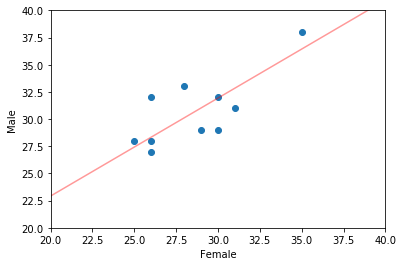

In [64]:
plt.scatter(x, y)
a = params[0]
b = params[1]
f = lambda x: a * x + b
x_space = np.linspace(-20, 100, 200)
y_space = f(x_space)
plt.plot(x_space, y_space, c='r', alpha=.4)
plt.xlim(20, 40)
plt.ylim(20, 40)
plt.xlabel('Female')
plt.ylabel('Male')
plt.show()

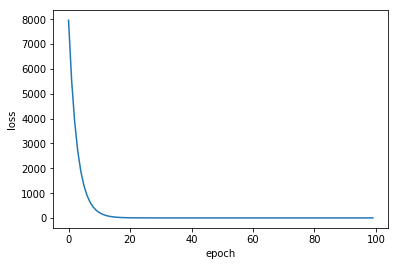

In [65]:
plt.plot(loss_path)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [66]:
x_space = np.linspace(0, 7, 100)
y_space = np.linspace(4.5, 5.5, 100)
x_space, y_space = np.meshgrid(x_space, y_space)
z_space = np.zeros((100,100))
for i in range(100):
    for j in range(100):
        z_space[i][j] = loss_function(x_space[i][j], y_space[i][j])

In [67]:
epoch = 0
a_show = []
b_show = []
loss_show = []

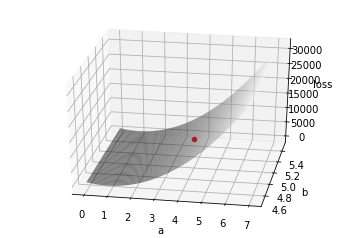

In [69]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

ax = plt.axes(projection='3d')
ax.view_init(azim=-80, elev=30)
ax.plot_surface(x_space, y_space, z_space, cmap=plt.cm.gray, alpha=.5)
a_show.append(np.array(params_path)[:,0][epoch])
b_show.append(np.array(params_path)[:,1][epoch])
loss_show.append(loss_path[epoch])
ax.scatter(a_show, b_show, loss_show, c='r')
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('loss')
epoch += 1
plt.show()